In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [3]:
n = pypsa.Network("results/testBiomass5/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f8f72dc2bb0>,
 <matplotlib.collections.LineCollection at 0x7f8f719ec190>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


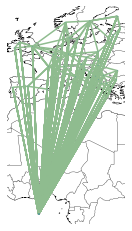

In [4]:
n.plot()

In [5]:
n.objective / 1e9 #billion EUR p.a.

584.7716610853975

In [6]:
import cartopy.crs as ccrs

In [7]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

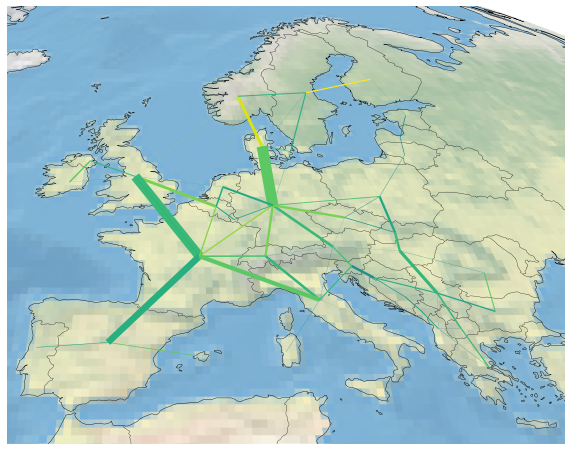

In [8]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac         0.015276
AL0 0 onwind             0.015602
AL0 0 solar          17868.707208
AT0 0 onwind             0.032205
AT0 0 ror             4478.505031
                        ...      
SK0 0 onwind             0.042093
SK0 0 ror              641.330000
SK0 0 solar              0.440233
EU gas              814794.679088
EU oil              969562.149129
Name: p_nom_opt, Length: 152, dtype: float64

In [10]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
GB4 0 Fischer-Tropsch      0.022665
IE4 0 Fischer-Tropsch      0.020509
GB5 0 Fischer-Tropsch      0.019727
LU0 0 Fischer-Tropsch      0.016284
BE0 0 Fischer-Tropsch      0.016006
NO3 0 Fischer-Tropsch      0.016005
NL0 0 Fischer-Tropsch      0.015916
DE0 0 Fischer-Tropsch      0.015887
SE3 0 Fischer-Tropsch      0.015806
FR0 0 Fischer-Tropsch      0.015777
CH0 0 Fischer-Tropsch      0.015765
AT0 0 Fischer-Tropsch      0.015635
DK0 0 Fischer-Tropsch      0.015611
FI3 0 Fischer-Tropsch      0.015608
HR0 0 Fischer-Tropsch      0.015608
SK0 0 Fischer-Tropsch      0.015598
DK3 0 Fischer-Tropsch      0.015589
CZ0 0 Fischer-Tropsch      0.015573
HU0 0 Fischer-Tropsch      0.015513
SI0 0 Fischer-Tropsch      0.015442
PL0 0 Fischer-Tropsch      0.015395
RS0 0 Fischer-Tropsch      0.015212
AL0 0 Fischer-Tropsch      0.015160
BA0 0 Fischer-Tropsch      0.015123
ME0 0 Fischer-Tropsch      0.015037
MK0 0 Fischer-Tropsch      0.014801
RO0 0 Fischer-Tropsch      0.014678
LT6 0 Fischer-Tropsch  

In [9]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
BEV charger                                            704.126759
BioSNG                                                   0.006824
DAC                                                      0.016331
DC                                                     462.826668
Fischer-Tropsch                                          0.136028
H2 Electrolysis                                          8.401484
H2 Fuel Cell                                             0.097543
H2 pipeline                                              5.974879
OCGT                                                   170.615985
SMR                                                      0.259987
SMR CC                                                  74.080104
Sabatier                                                 0.060564
V2G                                                    704.126759
battery charger                                          1.708647
battery discharger                                       1.743881
co

In [12]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,9.864504
2013-01-05 01:00:00,20.294053
2013-01-09 02:00:00,30.723468
2013-01-13 03:00:00,41.069340
2013-01-17 04:00:00,51.501747
...,...
2013-12-14 14:00:00,771.669890
2013-12-18 15:00:00,781.577884
2013-12-22 16:00:00,790.878394


In [13]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-101695.912492
2013-01-05 01:00:00,-107521.124310
2013-01-09 02:00:00,-107519.748441
2013-01-13 03:00:00,-106658.471343
2013-01-17 04:00:00,-107550.590320
...,...
2013-12-14 14:00:00,-105226.546749
2013-12-18 15:00:00,-102144.264729
2013-12-22 16:00:00,-95881.544361


In [14]:
n.stores.e_nom_opt

name
co2 atmosphere           2.299356e+08
co2 stored               8.037474e+08
EU gas Store             2.986480e+08
DE0 0 H2 Store           3.715271e+01
DK0 0 H2 Store           3.446120e+01
                             ...     
RO0 0 battery storage    2.709375e+04
RS0 0 battery storage    2.028825e+04
SE3 0 battery storage    2.750344e+04
SI0 0 battery storage    6.984375e+03
SK0 0 battery storage    1.093313e+04
Name: e_nom_opt, Length: 677, dtype: float64

In [15]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry           0.020729
DE0 0 solid biomass for lowT industry CC     2429.702170
DE0 0 methane for lowT industry                 0.013968
DE0 0 methane for lowT industry CC          19732.565603
DE0 0 H2 for lowT industry                      0.009814
Name: p_nom_opt, dtype: float64

In [17]:
n.links.loc[n.links.carrier=='digestable biomass to gas'].p_nom_opt.sort_values(ascending=False).head(50)

name
DE0 0 digestable biomass    0.006529
ES0 0 digestable biomass    0.006498
IT0 0 digestable biomass    0.006483
PL0 0 digestable biomass    0.006398
DK0 0 digestable biomass    0.006121
HU0 0 digestable biomass    0.006121
RO0 0 digestable biomass    0.005983
GB5 0 digestable biomass    0.005976
CZ0 0 digestable biomass    0.005946
PT0 0 digestable biomass    0.005939
NL0 0 digestable biomass    0.005857
BE0 0 digestable biomass    0.005837
SE3 0 digestable biomass    0.005756
IE4 0 digestable biomass    0.005752
FR0 0 digestable biomass    0.005739
DK3 0 digestable biomass    0.005660
LT6 0 digestable biomass    0.005618
SK0 0 digestable biomass    0.005569
RS0 0 digestable biomass    0.005350
EE6 0 digestable biomass    0.005078
AT0 0 digestable biomass    0.005039
LV6 0 digestable biomass    0.005039
GR0 0 digestable biomass    0.005000
FI3 0 digestable biomass    0.004880
BG0 0 digestable biomass    0.004827
CH0 0 digestable biomass    0.004789
GB4 0 digestable biomass    0.004

In [4]:
n.links.p_nom_opt.filter(regex='SE.*digestable').head(50)

name
SE3 0 manureslurry digestable biomass          0.235144
SE3 0 municipal biowaste digestable biomass    0.231566
SE3 0 sewage sludge digestable biomass         0.251140
SE3 0 straw digestable biomass                 0.238556
SE3 0 digestable biomass                       1.006718
Name: p_nom_opt, dtype: float64

In [17]:
n.links.p_nom_opt.filter(regex='DE.*solid').head(50) #GW

name
DE0 0 solid biomass for lowT industry             0.030866
DE0 0 solid biomass for lowT industry CC      15952.402430
DE0 0 poplar solid biomass                     2558.050422
DE0 0 forest residues solid biomass           32485.198110
DE0 0 industry wood residues solid biomass    11918.773401
DE0 0 import1 solid biomass                       0.025228
DE0 0 import2 solid biomass                       0.023633
DE0 0 import3 solid biomass                       0.021889
DE0 0 import4 solid biomass                       0.020351
DE0 0 import5 solid biomass                       0.019000
DE0 0 import6 solid biomass                       0.017823
DE0 0 import7 solid biomass                       0.016704
DE0 0 import8 solid biomass                       0.014872
DE0 0 import9 solid biomass                       0.014468
DE0 0 solid biomass to gas                        0.000311
DE0 0 urban central solid biomass CHP             0.008519
DE0 0 urban central solid biomass CHP CC      22856

In [16]:
n.links.p_nom_opt.filter(regex='Tropsch').sum()#head(50) #GW?

0.2288007387006432

In [13]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


In [15]:
n.links_t.p0.filter(regex='biomass').sum().sum()*3.6/1e6 #PJ

143.0153489925513

In [26]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


In [8]:
n.loads_t.p.filter(regex='DE.*transport').sum()/1e6#*3.6/1e6 #PJ

name
DE0 0 land transport EV     0.382169
DE0 0 land transport oil    3.820343
dtype: float64

In [6]:
n.loads_t.p.filter(regex='electricity').sum().sum()*3.6/1e6

63.47249999999998

In [14]:
n.stores_t.p.filter(regex='solid biomass').sum().sum()*3.6/1e6

19.86323702847065

In [10]:
n.stores_t.p.filter(regex='digestable biomass').sum().sum()*3.6/1e6

0.011681775024000297

In [25]:
n.stores_t.e.filter(regex='import').head(5)

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.787028e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-05 01:00:00,1.787028e+09,2.777777e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-09 02:00:00,1.787028e+09,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777778e+08,2.777778e+08
2013-01-13 03:00:00,1.787028e+09,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08
2013-01-17 04:00:00,1.787028e+09,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08


In [5]:
n.links_t.p0.filter(regex='import').sum().sum()

11.961424303006696

In [7]:
n.links_t.p0

name,1,10,11,12,12998,13,14,14531,14537,14538,...,T2,T21,T22,T23,T24,co2 vent,gas for industry,gas for industry CC,process emissions,process emissions CC
name,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,-571.602731,7288.172110,-476.849334,-1114.462144,887.755448,19.755906,7170.271585,-249.991187,4988.782600,0.000539,...,-0.009586,0.030684,0.000005,0.000810,33.408511,0.000234,0.012219,48263.558215,0.000926,17651.825558
2013-01-05 01:00:00,1253.260500,7299.375117,-2526.208665,920.966910,415.402189,19.717063,-7168.752135,-53.512886,4404.496242,-0.000679,...,-0.000380,0.001277,0.000166,-0.000128,-32.744388,0.000192,0.012221,48263.558212,0.000925,17651.825559
2013-01-09 02:00:00,-29.429376,7298.683011,-1489.623399,-160.181555,-998.460155,19.047802,-7167.809656,250.000366,-10962.422843,0.000525,...,-0.000183,0.000827,-0.000064,-0.003069,-33.406344,0.000201,0.012230,48263.558202,0.000928,17651.825556
2013-01-13 03:00:00,-2386.236256,5650.506261,875.443606,-2330.461230,-999.615797,18.854108,-7168.820982,237.477116,-8780.301599,-0.000697,...,0.000017,-0.000336,0.000074,0.000047,27.961722,0.000205,0.012232,48263.558200,0.000929,17651.825555
2013-01-17 04:00:00,-2386.748507,7300.022086,416.104516,-2106.389303,-966.627284,19.018503,7170.271718,-248.495997,3135.071768,-0.002301,...,-0.010029,0.031151,0.000819,-0.003215,-32.619507,0.000249,0.012238,48263.558193,0.000932,17651.825552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,2387.938206,6144.614261,-3659.845608,1824.484224,672.787578,20.317353,7170.271483,-249.999358,12051.703056,-0.000999,...,-0.010546,0.031702,0.004835,0.000265,30.060453,0.000285,0.012234,48263.558197,0.000937,17651.825547
2013-12-18 15:00:00,-332.035307,7289.564329,-555.482846,-1172.418444,717.343698,19.751165,7170.272095,-250.000487,12051.702514,-0.019840,...,-0.010493,0.031648,0.004764,-0.000058,30.000185,0.000300,0.012237,48263.558194,0.000940,17651.825544
2013-12-22 16:00:00,890.648785,7298.529230,-2301.667844,651.567146,274.354780,19.059828,7170.270511,-249.091372,12051.703053,-0.001012,...,-0.010433,0.031578,0.004832,-0.000118,33.418156,0.000263,0.012238,48263.558194,0.000940,17651.825544
